# Chem 30324, Spring 2019, Homework 7

# Due March 25, 2019

## Quantum mechanics of an H atom: 
### Consider an excited hydrogen atom with a 2s$^1$ electron configuration. The 2s radial wavefunction is given by $$R_{2,0} = \frac{1}{\sqrt{2a_0^3}}(1-\rho/2)e^{-\rho/2}, \rho = r/a_0$$ where $a_0$ = bohr radius. (*Hint:* It’s easiest to solve the following using $a_0$ as the unit of length.)

### 1. Provide a hand sketch of the 3-D shape of a 2s wavefunction (“orbital”). Be sure to indicate the *sign* of the wavefunction in each region and the location(s) of nodes. How many radial and how many angular nodes does a 2s electron orbital have?

Quantum number ($𝑛,𝑙,𝑚𝑙$) of 2s = 2,0,0. From notes, radial node $= n-1 =1$, while angular node $= l = 0$. 
Your sketch should be similar to http://www.grandinetti.org/electron-orbital-shapes. ![](http://www.grandinetti.org/resources/Teaching/Chem121/Lectures/OrbitalShapes/2sOrbital.gif)

### 2. Plot the radial probability function $P_{20}(r) = r^2\lvert R_{2,0}(r)\rvert^2$. Be sure to label both axes appropriately. (*Hint:* Stick with $a_0$ as the length unit.)

$P_{20}(r) = r^2\lvert R_{2,0}(r)\rvert^2 = \rho^2a_0^2[\frac{1}{\sqrt{2a_0^3}}(1-\rho/2)e^{-\rho/2}]^2 = \frac{\rho^2}{2}(1-\rho/2)^2e^{-\rho}\frac{1}{a_0}$. Plot $\frac{\rho^2}{2}(1-\rho/2)^2e^{-\rho}$ vs $\rho$, the unit of P is $\frac{1}{a_0}$. 

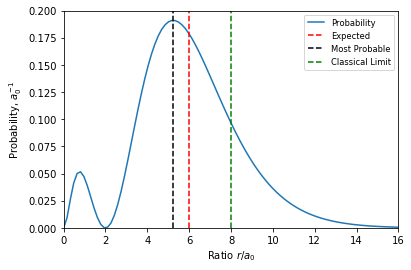

In [7]:
import numpy as np
import matplotlib.pyplot as plt

rho = np.linspace(0,16,100)
P = rho**2/2*(1-rho/2)**2*np.exp(-rho) # a0 is cancelled out due to normalization
plt.plot(rho,P,label='Probability')

plt.xlim(0,16)
plt.ylim(0,0.2)
plt.xlabel('Ratio $r/a_0$')
plt.ylabel('Probability, $a_0^{-1}$')


# From calculations below
plt.axvline(x=6,color='r',linestyle='--',label='Expected') # draw a vertical dash line
plt.axvline(x=3+np.sqrt(5),color='k',linestyle='--',label='Most Probable')
plt.axvline(x=8,color='g',linestyle='--',label='Classical Limit')
plt.legend(fontsize = 'small')
plt.show()

### 3. Determine and indicate on your plot $\langle r\rangle$, the expectation value of the distance of the electron from the nucleus.

$\langle r\rangle = \int_{0}^{\infty}rP_{20}dr = \int_{0}^{\infty}\frac{\rho^3}{2}(1-\rho/2)^2e^{-\rho}dr = a_0\int_{0}^{\infty}\frac{\rho^3}{2}(1-\rho/2)^2e^{-\rho}d\rho$

In [8]:
from sympy import * 
rho = symbols('rho')
I = integrate(rho**3/2*(1-rho/2)**2*exp(-rho),(rho,0,oo))
print(I,"a0")

6 a0


### 4. Determine and indicate on your plot  $r_{MP}$, the most probable distance of the electron from the nucleus.

In [9]:
print("Possible solutions are ", solve(diff(rho**2/2*(1-rho/2)**2*exp(-rho),rho),rho))

Possible solutions are  [0, 2, -sqrt(5) + 3, sqrt(5) + 3]


From graph in prob 2, the most probable distance of the electron from the nucleus is $(\sqrt{5}+3)a_0$.

### 5. Determine and indicate on your plot the maximum classical distance of the electron from the nucleus in this orbital.

Classical theory states that orbitals energy must equals to Coulombic energy: $$-\frac{\hbar^2}{2m_ea_o^2}\frac{1}{N^2} = -\frac{e^2}{4\pi\epsilon_0}\frac{1}{r}, where\quad N=2\quad and \quad a_0 = \frac{4\pi\epsilon_0\hbar^2}{m_ee^2}$$ 
$$r_{max,classic} = 8a_0$$

### 6. What is the probability of finding the electron beyond the classical distance? (Evaluate the necessary integral numerically.)

In [10]:
rho_ = symbols('rho_')
I = integrate(rho_**2/2*(1-rho_/2)**2*exp(-rho_),(rho_,8,oo)) #intrgrate from 8 to infinity
print("Prob = %f"%I)

Prob = 0.185511


### 7. Can a 2s electron undergo an allowed transition to a lower energy electronic state? If so, what frequency (in cm$^{-1}$) of light would be emitted?

Quantum number ($n,l,m_l$) of 2s = 2,0,0 while 1s = 1,0,0. Since $\Delta l\neq \pm 1$, the transition is not allowed.

## Variations on the hydrogen atom:
### The *variational principle* guarantees that the expectation value of the energy of a guessed wavefunction is allows greater than that of the true lowest energy solution. Here you will apply the variational principle to the H atom.  For this problem it is easiest to work in atomic units.  In these units, $\hbar$, $a_0$, and $4\pi\epsilon_0$ are all equal to 1 and the unit of energy is the Hartree, equivalent to 27.212 eV.  In atomic units the H atom Schrödinger equation is written:

$$\left \{-\frac{1}{2}\frac{d^2}{dr^2} - \frac{1}{r}\frac{d}{dr}-\frac{1}{r}+\frac{l(l+1)}{2r^2}  \right \}R(r) = ER(r)$$

### 8. Suppose in a fit of panic you forget the 1s radial function when asked on an exam. Not wanting to leave the answer blank, you decide to guess something, and liking bell-shaped curves, you guess $R_{10}(r) = e^{-r^2}$.  Normalize this guess. Do not forget to include the $r^2$ integration factor.

Simply let $R(r) = Ce^{-r^2}$ and  then find C using $C^2*\int_{0}^{\infty}r^2e^{-2r^2}dr = 1$

In [11]:
r = symbols('r')
I = integrate(r**2*exp(-2*r**2),(r,0,oo))
print("C = ",sqrt(1/I))

C =  2*2**(1/4)*sqrt(2)/pi**(1/4)


So the normalized 1s wavefunction is $\tilde{R}_{10}(r) = (\frac{128}{\pi})^{1/4}e^{-r^2}$.

### 9. Calculate the expectation value of the energy of your normalized guess.  Is it greater or less than the true value?

1s orbital: $l=0$
$$\hat{H} = -\frac{1}{2}\frac{d^2}{dr^2} - \frac{1}{r}\frac{d}{dr}-\frac{1}{r}$$ 
$$\frac{d}{dr}e^{-r^2} = -2re^{-r^2}$$
$$\frac{d^2}{dr^2}e^{-r^2} = -2e^{-r^2} + 4r^2e^{-r^2}$$
$$\hat{H}\tilde{R}_{10}(r) = C(-2r^2+3-1/r)e^{-r^2}$$
The expectation value of the energy:
$$\langle E\rangle = \int_{0}^{\infty}\tilde{R}_{10}(r)\hat{H}\tilde{R}_{10}(r)r^2dr = \int_{0}^{\infty} C^2(-2r^4+3r^2-r)e^{-2r^2} dr$$

In [12]:
E = 1/I*integrate((-2*r**4+3*r**2-r)*exp(-2*r**2),(r,0,oo))
print('Expected value = %f Ha.'%E)

Expected value = -0.095769 Ha.


In [17]:
# Hydrogen atoms energy equation is given in class notes
EH = 1 # Ha
N = 1 # number of electrons
E = -EH/(2*N**2)
print('True value = %f Ha.\nTherefore, expected value is greater (less negative) than true value.'%E)

True value = -0.500000 Ha.
Therefore, expected value is greater (less negative) than true value.


### 10. What does the variational principle say about the expectation value of the energy of your guess as you vary a parameter $\gamma$ in your guess, $R_{10}=e^{-\gamma r^2}$?  Suggest a strategy for determining the "best" $\gamma$.

From the outline, we know from variational principle that true wavefuncion eneergy is always the lower bound on energy of any trial wavefunction: 

$$\langle \psi^\lambda_{trial}|\hat{h}|\psi^\lambda_{trial}\rangle = E^\lambda_{trial}\geq E_0$$

To find the "best" $\gamma$, we only need to find where satisfies:

$$\frac{\partial\langle E\rangle}{\partial\gamma}=0$$

### 11. *Extra credit*: Determine the best value of $\gamma$.  Show and carefully justify your work to receive credit.

Norminalize $R_{10}$: $\int^\infty_0 r^2 C^2 e^{-2\gamma r^2}dr=1$

$\langle E\rangle=\int_{0}^{\infty}\tilde{R}_{10}(r)\hat{H}\tilde{R}_{10}(r)r^2dr = \int_{0}^{\infty} C^2(-2\gamma r^4+3\gamma r^2-r)e^{-2\gamma r^2} dr$

Expectation of energy:
8*sqrt(2)*gamma**(3/2)*(-1/(4*gamma) + 3*sqrt(2)*sqrt(pi)/(16*sqrt(gamma)) - 3*sqrt(2)*sqrt(pi)/(32*gamma**(3/2)))/sqrt(pi)
Best value of gamma is: [2/(9*pi)], which equals to 0.070736.
Energy with the best gamma: -1.712207 eV.


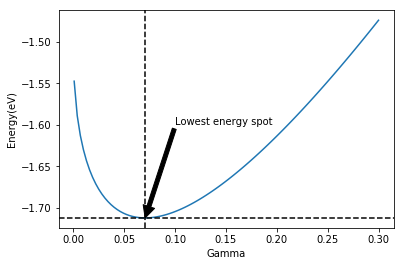

In [45]:
from sympy import *

gamma = symbols("gamma",positive=True)  # We know the gamma has to be positive, or the R10 would be larger when r increase. 
r = symbols("r",positive=True)
pi = symbols("pi",positive=True)

C = sqrt(1/(integrate(r**2*exp(-2*gamma*r**2),(r,0,oo))))
Eex = C**2*integrate((-2*gamma*r**4+3*gamma*r**2-r)*exp(-2*gamma*r**2),(r,0,oo))
gammabest = solve(diff(Eex,gamma),gamma)

print("Expectation of energy:");print(Eex)
print("Best value of gamma is: %s, which equals to %f."% (gammabest,2/(9*np.pi)))

gammab = 2/(9*np.pi)
Ebest = 8*math.sqrt(2)*gammab**(3/2)*(-1/(4*gammab) + 3*math.sqrt(2)*math.sqrt(np.pi)/(16*math.sqrt(gammab)) - 3*math.sqrt(2)*math.sqrt(np.pi)/(32*gammab**(3/2)))/math.sqrt(np.pi)
print("Energy with the best gamma: %f eV."%Ebest)

import matplotlib.pyplot as plt
import numpy as np
import math

gamma = np.linspace(0.001,0.3,100)
E = []
for x in gamma:
    E.append(8*math.sqrt(2)*x**(3/2)*(-1/(4*x) + 3*math.sqrt(2)*math.sqrt(np.pi)/(16*math.sqrt(x)) - 3*math.sqrt(2)*math.sqrt(np.pi)/(32*x**(3/2)))/math.sqrt(np.pi))

plt.plot(gamma,E)
plt.xlabel("Gamma")
plt.ylabel("Energy(eV)")
plt.axvline(x=2/(9*np.pi),color='k',linestyle='--')
plt.axhline(y=Ebest,color='k',linestyle='--')
plt.annotate('Lowest energy spot', xy=(2/(9*np.pi), Ebest), xytext=(0.10,-1.60), arrowprops=dict(facecolor='black'))
plt.show()



## Many-electrons means many troubles
### Helium (He) is only one electron larger than hydrogen, but that one more electron makes a big difference in difficulty in setting up and solving the Schrödinger equation.

### 12. Write down in as much detail as you can the exact Schrödinger equation for the electrons in a He atom.

Schrödinger equation: 

$$\hat{H}\Psi(r_1,r_2)=E\Psi(r_1,r_2)$$

$$\hat{H}=\hat{h_1}+\hat{h_2}+\frac{e^2}{4\pi\epsilon_0}\frac{1}{|r_1-r_2|}$$

$$\hat{h_1}=-\frac{\hbar^2}{2m_e}\nabla^2_1-\frac{2e^2}{4\pi\epsilon_0}\frac{1}{r_1}$$

$$\hat{h_2}=-\frac{\hbar^2}{2m_e}\nabla^2_2-\frac{2e^2}{4\pi\epsilon_0}\frac{1}{r_2}$$

$$\Psi(r_1,r_2)\approx\phi_1(r_1)\phi_2(r_2)$$

### 13. This equation is conventionally solved within the "independent electron" approximation, by writing an effective one-electron Schrödinger equation with approximate potentials (shown below in atomic units).  Briefly, what does it mean to solve this equation "self-consistently"?

$$\left\{-\frac{1}{2}\nabla^2 - \frac{2}{r} + \hat v_\mathrm{Coul}[\psi_i] + \hat
            v_\mathrm{ex}[\psi_i]+\hat v_\mathrm{corr}[\psi_i] \right\}\psi=\epsilon\psi$$
            


All the potential terms $\hat{\nu}$ depend on the $\psi$ solved. The self-consistently means we get a $\psi$ solution, then we use it to calculate new potential terms and solve for new $\psi$, and repeat until we get a $\psi$ same with the last one.

### 14. How many solutions are needed to describe the electrons in a He atom?  Provide a possible set of quantum numbers ($n, l, m_l , m _s$)  for each electron.

One solution for each orbital, so there needs to be only one solution to describe the electrons in the He atom. 

Two possible set of quantum numbers for each electron: 
$$n=1, l=0, m_l=0, m_s=+\frac{1}{2}$$
$$n=1, l=0, m_l=0, m_s=-\frac{1}{2}$$

### 15. The Schrödinger equation has five terms, or operators, on the left.  Identify the physical meaning of each term and the *sign* of the expectation value when it is applied to one of the solutions.

$-\frac{1}{2}\nabla^2$: Kinetic energy operator for each electron.

$-\frac{2}{r}$: Due to the attraction between the electron and the nucleus.

$\hat{\nu}_{coul}$: Classical repulsion between distinguishable electron “clouds”.

$\hat{\nu}_{ex}$: Accounts for electron indistinguishability (Pauli principle for fermions). Decreases
Coulomb repulsion because electrons of like spin intrinsically avoid one another.

$\hat{\nu}_{corr}$: Decrease in Coulomb repulsion due to dynamic ability of electrons to avoid
one another; “fixes” orbital approximation.

### Sophisticated computer programs that solve the many-electron Schrödinger equation are now widely available and powerful tool for predicting the properties of atoms, molecules, solids, and interfaces. *Density functional theory* (DFT) is the most common set of approximations for the electron-electron interactions used today. In this problem you’ll do a DFT calculation using the *Gaussian* program (<http://www.gaussian.com>).

### Now, let’s set up your calculation (you may do this with a partner or two if you choose):
1. Log into the Webmo server https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi using "guest" as your username and password.
2. Select New Job-Creat New Job.
3. Use the available tools to draw an atom on the screen.
4. Use the right arrow at the bottom to proceed to the Computational Engines.
5. Choose Gaussian
6. Select “Molecular Orbitals” for the Calculation type, “B3LYP” for theory, “Normal” for the basis set, “0” for the charge, and “Singlet” for the multiplicity.
7. Select the right arrow to run the calculation.
8. From the job manager window choose the completed calculation to view the results.
9. For fun, click on the Magnifying Glass icons to see the molecular orbitals in 3-D. You may have to play around with the Display Settings and Preferences to get good views.

### 16. Perform calculations on the first four members of the noble gas series (He, Ne, Ar, Kr).  Make a table of energies of the occupied orbitals and identify them by their shell ( $n = 1, 2, \ldots$) and subshell (s, p, d, ...). 

If B3LYP - Accurate setting is used, you should the following results:

|He|Energy (Hartree)|Ne|Energy (Hartree)|Ar|Energy (Hartree)|Kr|Energy (Hartree)|
|-|-|-|-|-|-|-|-|
|1s|-0.65806|1s|-30.97187|1s|-115.12526|1s|-512.74646|
|2s|-|2s|-1.46152|2s|-11.1458|2s|-67.12935|
|2p|-|2p|-0.57669|2p|-8.69834|2p|-60.70459|
|3s|-|3s|-|3s|-0.97106|3s|-9.64995|
|3p|-|3p|-|3p|-0.42921|3p|-7.35264|
|4s|-|4s|-|4s|-|4s|-3.22568|
|3d|-|3d|-|3d|-|3d|-0.89178|
|4p|-|4p|-|4p|-|4p|-0.38523|

Just for fun, we can also look at results produced by other methods: Hartree-Fock, Local Density Approximation, and Generalized Gradient Approximation. 

From our plot, we observed that LDA, GGA, B3LYP are all nearly the same, while HF is much different. Besides, we also see that "accurate" basis set is generally better than minimal basis set. 

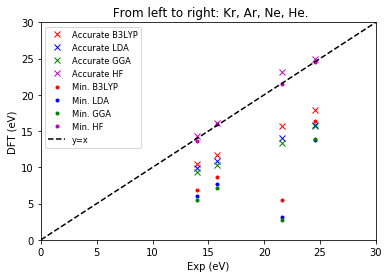

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Experiment data from https://en.wikipedia.org/wiki/Ionization_energies_of_the_elements_(data_page)
exp = [24.587, 21.565, 15.760, 14.000] 

b3lyp_acc = [17.907, 15.693, 11.680, 10.483] # b3lyp & maximum basis set, where acc=accurate
lda_acc = [15.904, 14.113, 10.899, 9.912] # lda & maximum basis set
gga_acc = [15.635, 13.377, 10.295, 9.292] # gga & maximum basis set
hf_acc = [24.950, 23.204, 16.092, 14.270] # hf & maximum basis set
b3lyp_min = [16.326, 5.475, 8.645, 6.830] # b3lyp & minimum basis set
lda_min = [13.830, 3.152, 7.632, 6.084] # lda & minimum basis set
gga_min = [13.916, 2.706, 7.147, 5.540] # gga & minimum basis set
hf_min = [24.588, 21.507, 16.019, 13.633] # hf & minimum basis set

x = np.linspace(0,30) # for y=x plot
plt.plot(exp,b3lyp_acc,'rx',label='Accurate B3LYP')
plt.plot(exp,lda_acc,'bx',label='Accurate LDA')
plt.plot(exp,gga_acc,'gx',label='Accurate GGA')
plt.plot(exp,hf_acc,'mx',label='Accurate HF')
plt.plot(exp,b3lyp_min,'r.',label='Min. B3LYP')
plt.plot(exp,lda_min,'b.',label='Min. LDA')
plt.plot(exp,gga_min,'g.',label='Min. GGA')
plt.plot(exp,hf_min,'m.',label='Min. HF')
plt.plot(x,x,'k--',label='y=x')
plt.xlim([0,30])
plt.ylim([0,30])
plt.xlabel('Exp (eV)')
plt.ylabel('DFT (eV)')
plt.legend(fontsize = 'small')
plt.title(' From left to right: Kr, Ar, Ne, He.')
plt.show()

### 17. Contrast the energies of the 1s electrons down the series.  Determine the wavelength of light necessary to remove each 1s electron. What range of the spectrum is this light in?

Energies decrease (more negative) as it goes down the series.

In [7]:
# From http://www.genstrom.net/public/biology/common/en/em_spectrum.html
hc = 1239.8 #eV*nm
E = [0.65806*27.212, 30.40785*27.212, 115.12526*27.212, 512.74646*27.212] # eV
lamb = [] #nm
for e in E:
    lamb.append(hc/e)
print(lamb,"nm.\nThey corresponds to EUV, Soft X-rays, Soft X-rays, Hard X-rays")

[69.23499682086387, 1.498323031978179, 0.39574965570490506, 0.0888563560398597] nm.
They corresponds to EUV, Soft X-rays, Soft X-rays, Hard X-rays


### 18. Compare the energies of the highest-energy (valence) electrons compare down the series. Determine the wavelength of light necessary to remove each valence electron. What range of the spectrum is this light in?

Except 1s in Helium, these energies are relatively similar to one another. 

In [6]:
hc = 1239.8 #eV*nm
E = [0.65806*27.212, 0.57669*27.212, 0.42921*27.212, 0.38523*27.212] # eV
print(E)
lamb = [] #nm
for e in E:
    lamb.append(hc/e)
print(lamb,"nm.\nThey corresponds to EUV, EUV, EUV/UV-C, EUV/UV-C")

[17.90712872, 15.69288828, 11.679662519999999, 10.48287876]
[69.23499682086387, 79.00393973874642, 106.1503273640821, 118.26903929584319] nm.
They corresponds to EUV, EUV, EUV/UV-C, EUV/UV-C
